# Image Classification Data (Fashion-MNIST)

Before introducing the implementation for softmax regression, we need a suitable datset. To make things more visually compelling we pick one on classification.
It will be used multiple times in later chapters to allow us to observe the difference between model accuracy and computational efficiency between comparison algorithms. The most commonly used image classification data set is the [MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digit recognition data set. It was proposed by LeCun, Cortes and Burges in the 1990s. However, most models have a classification accuracy of over 95% on MNIST, hence it is hard to spot the difference between different models. In order to get a better intuition about the difference between algorithms we use a more complex data set. [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) was proposed by [Xiao, Rasul and Vollgraf](https://arxiv.org/abs/1708.07747) in 2017.

## Getting the Data

First, import the packages or modules required in this section.

In [1]:
%matplotlib inline
import gluonbook as gb
from mxnet.gluon import data as gdata
import sys
import time

Next, we will download this data set through Gluon's `data` package. The data is automatically retrieved from the Internet the first time it is called. We specify the acquisition of a training data set, or a testing data set by the parameter `train`. The test data set, also called the testing set, is only used to evaluate the performance of the model and is not used to train the model.

In [2]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

The number of images for each category in the training set and the testing set is 6,000 and 1,000, respectively. Since there are 10 categories, the number of examples for the training set and the testing set is 60,000 and 10,000, respectively.

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

We can access any example by square brackets `[]`, and next, we will get the image and label of the first example.

In [4]:
feature, label = mnist_train[0]

The variable `feature` corresponds to an image with a height and width of 28 pixels. Each pixel is an 8-bit unsigned integer (uint8) with values between 0 and 255. It is stored in a 3D NDArray. Its last dimension is the number of channels. Since the data set is a grayscale image, the number of channels is 1. For the sake of simplicity, we will record the shape of the image with the height and width of $h$ and $w$ pixels, respectively, as $h \times w$ or `(h, w)`.

In [5]:
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

The label of each image is represented as a scalar in NumPy. Its type is a 32-bit integer.

In [6]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

There are 10 categories in Fashion-MNIST: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag and ankle boot. The following function can convert a numeric label into a corresponding text label.

In [7]:
# This function has been saved in the gluonbook package for future use.
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

The following defines a function that can draw multiple images and corresponding labels in a single line.

In [8]:
# This function has been saved in the gluonbook package for future use.
def show_fashion_mnist(images, labels):
    gb.use_svg_display()
    # Here _ means that we ignore (not use) variables.
    _, figs = gb.plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

Next, let's take a look at the image contents and text labels for the first nine examples in the training data set.

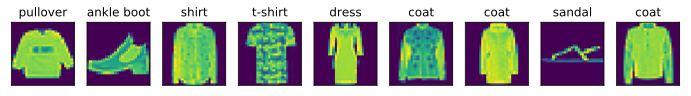

In [9]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

## Reading a Minibatch

To make our life easier when reading from the training and test sets we use a `DataLoader` rather than creating one from scratch, as we did in the section on ["Linear Regression Implementation Starting from Scratch"](linear-regression-scratch.md). The data loader reads a mini-batch of data with an example number of `batch_size` each time.

In practice, data reading is often a performance bottleneck for training, especially when the model is simple or when the computer is fast. A handy feature of Gluon's `DataLoader` is the ability to use multiple processes to speed up data reading (not currently supported on Windows). For instance, we can set aside 4 processes to read the data (via `num_workers`).

In addition, we convert the image data from uint8 to 32-bit floating point numbers using the `ToTensor` class. Beyond that we divide all numbers by 255 so that all pixels have values between 0 and 1. The `ToTensor` class also moves the image channel from the last dimension to the first dimension to facilitate the convolutional neural network calculations introduced later. Through the `transform_first` function of the data set, we apply the transformation of `ToTensor` to the first element of each data example (image and label), i.e., the image.

In [10]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers = 0  # 0 means no additional processes are needed to speed up the reading of data.
else:
    num_workers = 4

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
                              batch_size, shuffle=True,
                              num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                             batch_size, shuffle=False,
                             num_workers=num_workers)

The logic that we will use to obtain and read the Fashion-MNIST data set is encapsulated in the `gluonbook.load_data_fashion_mnist` function, which we will use in later chapters. This function will return two variables, `train_iter` and `test_iter`. As the content of this book continues to deepen, we will further improve this function. Its full implementation will be described in the section ["Deep Convolutional Neural Networks (AlexNet)"](../chapter_convolutional-neural-networks/alexnet.md).

Let's look at the time it takes to read the training data.

In [11]:
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'1.28 sec'

## Summary

* Fashion-MNIST is an apparel classification data set containing 10 categories, which we will use to test the performance of different algorithms in later chapters.
* We store the shape of image using height and width of $h$ and $w$ pixels, respectively, as $h \times w$ or `(h, w)`.
* Data iterators are a key component for efficient performance. Use existing ones if available.

## Problems

1. Does reducing `batch_size` (for instance, to 1) affect read performance?
1. For non-Windows users, try modifying `num_workers` to see how it affects read performance.
1. Use the MXNet documentation to see which other datasets are available in `mxnet.gluon.data.vision`.
1. Use the MXNet documentation to see which other transformations are available in `mxnet.gluon.data.vision.transforms`.

## Discuss on our Forum

<div id="discuss" topic_id="2335"></div>